<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data_add_delta_(_1_6)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_-1.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-1.6_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,41.220307,34.845144,70.980832,-0.001124,157.045160,157.047094,-0.001934
1,0.0,1.0,36.201327,80.620682,71.236271,0.000834,198.059113,198.055859,0.003254
2,0.0,2.0,94.022741,32.397588,20.031061,0.003119,156.454509,156.453938,0.000571
3,0.0,3.0,55.245305,31.697141,41.518498,-0.004750,138.456194,138.461183,-0.004989
4,0.0,4.0,91.982932,61.713872,40.328161,0.001071,204.026036,204.027058,-0.001022
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,31.894108,57.189120,73.572637,0.002114,172.657979,172.656093,0.001886
19996,999.0,16.0,46.640474,67.302312,95.345620,-0.002190,219.286216,219.288926,-0.002710
19997,999.0,17.0,22.994239,60.861809,88.005442,0.001471,181.862961,181.862321,0.000640
19998,999.0,18.0,31.331489,66.317986,26.704789,-0.000860,134.353405,134.353876,-0.000471


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    41.220307  34.845144  70.980832  ...  157.045160  157.047094 -0.001934
      1.0    36.201327  80.620682  71.236271  ...  198.059113  198.055859  0.003254
      2.0    94.022741  32.397588  20.031061  ...  156.454509  156.453938  0.000571
      3.0    55.245305  31.697141  41.518498  ...  138.456194  138.461183 -0.004989
      4.0    91.982932  61.713872  40.328161  ...  204.026036  204.027058 -0.001022
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   31.894108  57.189120  73.572637  ...  172.657979  172.656093  0.001886
      16.0   46.640474  67.302312  95.345620  ...  219.286216  219.288926 -0.002710
      17.0   22.994239  60.861809  88.005442  ...  181.862961  181.862321  0.000640
      18.0   31.331489  66.317986  26.704789  ...  134.353405  134.353876 -0.000471
      19.0   41.450043  90.165272  79.599283  ...  221.214299  221.215575 -0.001276

[20000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    41.220307  34.845144  70.980832  ...  157.045160  157.047094 -0.001934
      1.0    36.201327  80.620682  71.236271  ...  198.059113  198.055859  0.003254
      2.0    94.022741  32.397588  20.031061  ...  156.454509  156.453938  0.000571
      3.0    55.245305  31.697141  41.518498  ...  138.456194  138.461183 -0.004989
      4.0    91.982932  61.713872  40.328161  ...  204.026036  204.027058 -0.001022
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   31.894108  57.189120  73.572637  ...  172.657979  172.656093  0.001886
      16.0   46.640474  67.302312  95.345620  ...  219.286216  219.288926 -0.002710
      17.0   22.994239  60.861809  88.005442  ...  181.862961  181.862321  0.000640
      18.0   31.331489  66.317986  26.704789  ...  134.353405  134.353876 -0.000471
      19.0   41.450043  90.165272  79.599283  ...  221.214299  221.215575 -0.001276

[20000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,41.220307,34.845144,70.980832,-0.001124,157.045160,157.047094,-0.001934
1,0.0,1.0,36.201327,80.620682,71.236271,0.000834,198.059113,198.055859,0.003254
2,0.0,2.0,94.022741,32.397588,20.031061,0.003119,156.454509,156.453938,0.000571
3,0.0,3.0,55.245305,31.697141,41.518498,-0.004750,138.456194,138.461183,-0.004989
4,0.0,4.0,91.982932,61.713872,40.328161,0.001071,204.026036,204.027058,-0.001022
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,31.894108,57.189120,73.572637,0.002114,172.657979,172.656093,0.001886
19996,999.0,16.0,46.640474,67.302312,95.345620,-0.002190,219.286216,219.288926,-0.002710
19997,999.0,17.0,22.994239,60.861809,88.005442,0.001471,181.862961,181.862321,0.000640
19998,999.0,18.0,31.331489,66.317986,26.704789,-0.000860,134.353405,134.353876,-0.000471


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    41.220307  34.845144  70.980832  ...  157.045160  157.047094 -0.001934
      1.0    36.201327  80.620682  71.236271  ...  198.059113  198.055859  0.003254
      2.0    94.022741  32.397588  20.031061  ...  156.454509  156.453938  0.000571
      3.0    55.245305  31.697141  41.518498  ...  138.456194  138.461183 -0.004989
      4.0    91.982932  61.713872  40.328161  ...  204.026036  204.027058 -0.001022
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   31.894108  57.189120  73.572637  ...  172.657979  172.656093  0.001886
      16.0   46.640474  67.302312  95.345620  ...  219.286216  219.288926 -0.002710
      17.0   22.994239  60.861809  88.005442  ...  181.862961  181.862321  0.000640
      18.0   31.331489  66.317986  26.704789  ...  134.353405  134.353876 -0.000471
      19.0   41.450043  90.165272  79.599283  ...  221.214299  221.215575 -0.001276

[20000 rows x 7 columns]

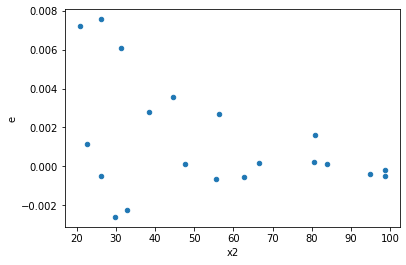

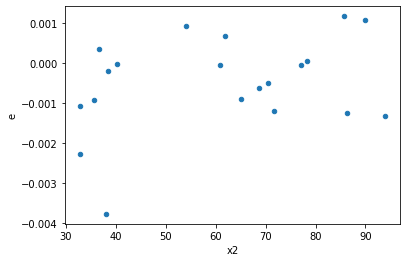

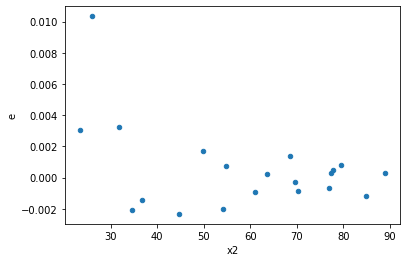

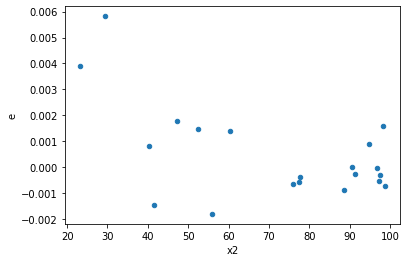

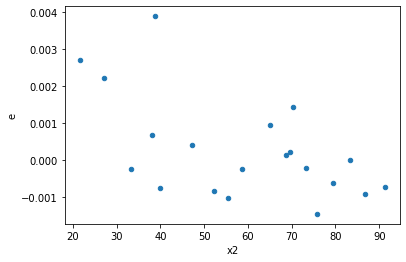

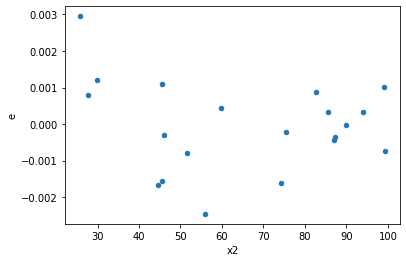

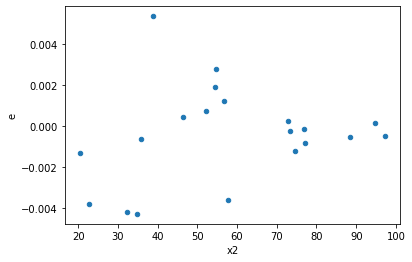

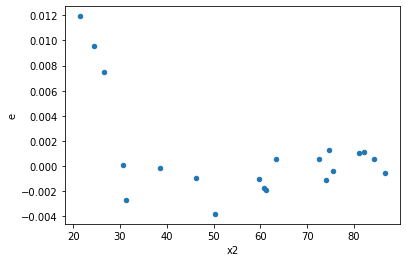

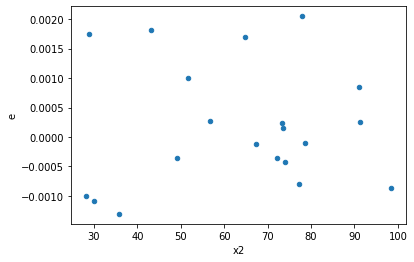

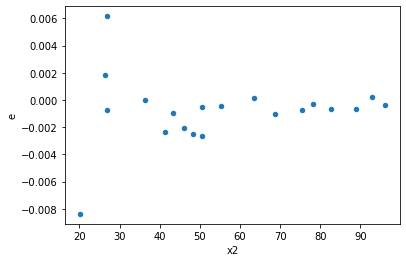

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]
    k_means = KMeans(n_clusters=2)
    model = k_means.fit(x)
    model

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = k_means.predict(x)
    y_kmeans

    # kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    data_sort_clusters = data_clusters.sort_values('clusters')
    data_sort_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster1 = data_sort_clusters[data_sort_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSR1 = model1.ssr
    MSE1 = model1.mse_resid

    # กลุ่มที่ 2
    data_cluster0 = data_sort_clusters[data_sort_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model0 = sm.OLS(y, x).fit()

    DF0 = model0.df_resid + 1
    SSR0 = model0.ssr
    MSE0 = model0.mse_resid

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSR1/DF1) / (SSR0/DF0)

    df1 = DF1
    df0 = DF0

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df0)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df0)
    
    return df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df0=[]
list_df1=[]
list_SSR0=[]
list_SSR1=[]
list_MSE0=[]
list_MSE1=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater=get_result(run_replicate)

    list_df0.append(df0)
    list_df1.append(df1)
    list_SSR0.append(SSR0)
    list_SSR1.append(SSR1)
    list_MSE0.append(MSE0)
    list_MSE1.append(MSE1)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid


In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
1.0,7.0,7.0,7.823326581755375e-06,9.398911785450102e-06,1.3038877636258958e-06,1.566485297575017e-06,1.2013958112613015,0.8149222526749162,0.5925388736625419,Reject005=1 : Homoscedasticity
2.0,7.0,7.0,1.0134919340272893e-05,0.00010862487831721104,1.6891532233788155e-06,1.810414638620184e-05,10.717882863218348,0.005699216546239283,0.9971503917268804,Reject005=0 : Heteroscedasticity
3.0,7.0,7.0,1.4543238190582066e-05,6.914649847433446e-05,2.4238730317636776e-06,1.1524416412389076e-05,4.754546241229306,0.05681746684856792,0.971591266575716,Reject005=1 : Homoscedasticity
4.0,5.0,9.0,1.5078825815565587e-05,3.305091375521412e-05,3.769706453891397e-06,4.131364219401765e-06,1.2177087909552204,0.8714235521566174,0.5642882239216913,Reject005=1 : Homoscedasticity
6.0,10.0,4.0,1.0425183727604144e-05,1.3541327375904107e-05,1.1583537475115715e-06,4.513775791968036e-06,3.247263484682993,0.11914116092553328,0.9404294195372334,Reject005=1 : Homoscedasticity
7.0,5.0,9.0,1.6661183803609934e-06,4.0036036059087513e-05,4.1652959509024834e-07,5.004504507385939e-06,13.34973703983114,0.010743540421026765,0.9946282297894866,Reject005=0 : Heteroscedasticity
9.0,6.0,8.0,3.815976663765401e-06,4.674172249838559e-05,7.631953327530802e-07,6.677388928340798e-06,9.186715476188873,0.014451251887313443,0.9927743740563433,Reject005=0 : Heteroscedasticity
11.0,5.0,9.0,3.978999325824644e-06,8.30432492324976e-06,9.94749831456161e-07,1.03804061540622e-06,1.1594658527100203,0.9179540525826391,0.5410229737086805,Reject005=1 : Homoscedasticity
13.0,6.0,8.0,3.327770754538007e-06,7.475128152764169e-06,6.655541509076015e-07,1.0678754503948813e-06,1.684715242757596,0.5414571186237185,0.7292714406881408,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,8.0,6.0,7.068451434660328e-05,1.3718493480795227e-05,1.0097787763800467e-05,2.7436986961590453e-06,0.2587741432496563,0.11674083434230285,Reject005=1 : Homoscedasticity
1.0,7.0,7.0,7.823326581755375e-06,9.398911785450102e-06,1.3038877636258958e-06,1.566485297575017e-06,1.2013958112613015,1.1850777473250838,Reject005=1 : Homoscedasticity
2.0,7.0,7.0,1.0134919340272893e-05,0.00010862487831721104,1.6891532233788155e-06,1.810414638620184e-05,10.717882863218348,0.005699216546239283,Reject005=0 : Heteroscedasticity
3.0,7.0,7.0,1.4543238190582066e-05,6.914649847433446e-05,2.4238730317636776e-06,1.1524416412389076e-05,4.754546241229306,0.05681746684856792,Reject005=1 : Homoscedasticity
4.0,5.0,9.0,1.5078825815565587e-05,3.305091375521412e-05,3.769706453891397e-06,4.131364219401765e-06,1.2177087909552204,1.1285764478433826,Reject005=1 : Homoscedasticity
5.0,7.0,7.0,0.00011773193799468163,3.929580741382798e-06,1.9621989665780273e-05,6.549301235637996e-07,0.03337735544249948,0.00021170037573895782,Reject005=0 : Heteroscedasticity
6.0,10.0,4.0,1.0425183727604144e-05,1.3541327375904107e-05,1.1583537475115715e-06,4.513775791968036e-06,3.247263484682993,0.11914116092553328,Reject005=1 : Homoscedasticity
7.0,5.0,9.0,1.6661183803609934e-06,4.0036036059087513e-05,4.1652959509024834e-07,5.004504507385939e-06,13.34973703983114,0.010743540421026765,Reject005=0 : Heteroscedasticity
8.0,7.0,7.0,1.2773619819843904e-05,4.147972561181159e-06,2.128936636640651e-06,6.913287601968599e-07,0.3247296083399363,0.1609596868132733,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      502
Reject005=0 : Heteroscedasticity    498
Name: Result_test, dtype: int64